# First of all, we will check if the data is linearly seperable in R30 dimensional space using Hard SVM

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

In [65]:
cols = ['ID', 'diagnosis', "mean_radius",
    "mean_texture",
    "mean_perimeter",
    "mean_area",
    "mean_smoothness",
    "mean_compactness",
    "mean_concavity",
    "mean_concave_points",
    "mean_symmetry",
    "mean_fractal_dimension",
    "radius_se",
    "texture_se",
    "perimeter_se",
    "area_se",
    "smoothness_se",
    "compactness_se",
    "concavity_se",
    "concave_points_se",
    "symmetry_se",
    "fractal_dimension_se",
    "worst_radius",
    "worst_texture",
    "worst_perimeter",
    "worst_area",
    "worst_smoothness",
    "worst_compactness",
    "worst_concavity",
    "worst_concave_points",
    "worst_symmetry",
    "worst_fractal_dimension"]
df = pd.read_csv('wdbc_data.csv', names= cols)
df.head()

,ID,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [66]:
diagnosis = []
for i in df['diagnosis']:
    if i == "M":
        x = 1
    elif i == "B":
        x = -1
    diagnosis.append(x)

In [67]:
df['diagnosis'] = diagnosis
df['diagnosis'].unique()

array([ 1, -1], dtype=int64)

In [68]:
cols = ['diagnosis', 'ID']
x = df.drop(cols, axis= 1)
y = df['diagnosis']

In [69]:
x.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [70]:
# scaling
for i in x.columns:
    x[i] = (x[i] - min(x[i])) / (max(x[i]) - min(x[i]))


In [71]:
x.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
count = 0
for i in y:
    if i == 1:
        count += 1
    else:
        continue
print(f"Number of M = {count}")
print(f"Number of M = {y.shape[0]-count}")

Number of M = 212
Number of M = 357


In [73]:
# Since the number of samples is small, we will need to use Over Sampling to balance the number of each class
ros = RandomOverSampler()
x, y = ros.fit_resample(x,y)

In [74]:
# Let's recheck the number of each class
count = 0
for i in y:
    if i == 1:
        count += 1
    else:
        continue
print(f"Number of M = {count}")
print(f"Number of M = {y.shape[0]-count}")

Number of M = 357
Number of M = 357


In [75]:
x = x.to_numpy()
y = y.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 101, test_size= 0.2)

In [76]:
# Set hyperparameters
lmbda = 0.01
lr = 1e-03
iter = 500

In [ ]:
# define your functions

def init_w(x):
    w = np.random.random(x.shape[1])
    b = np.random.random(1)
    return w, b

def loss(y, x, w, b, lmbda):
    return lmbda*np.linalg.norm(w) + max(0, 1-y*(np.dot(w, x.T)) - b )

def grad(w, x, y, lmbda, b, lr):
    for i in range(len(y)):
        output = y[i] * ( np.dot(w, x[i].T) - b )
        if output >= 1:
            w -= lr*2*lmbda*w
            b = b
        else:
            w -= lr*(2*lmbda*w - y[i]*x[i])
            b -= lr*y[i]
    return w, b

def predict(w, b, x):
    y = np.sign( np.dot(w, x.T) - b)
    return y

def accuracy(y_pred, y_test):
    q = 0
    n = len(y_test)
    for i in range(len(y_pred)):
        if y_pred[i] == y_test[i]:
            q += 1
    return (q/n)*100

def SVM(itr, w_i, b_i, x, y, lmbda, lr):
    k = 0
    w = w_i
    b = b_i
    
    while k < iter:
        W_final = w
        b_final = b 
        w, b = grad(W_final, x_train, y_train, lmbda, b_final, lr) 
        k += 1 
    
    return w, b

In [78]:
trial = []
glob_min_search = []
glob_W_search = []
glob_b_search = []

for i in range(25):
    w_i, b_i = init_w(x)

    w, b = SVM(iter, w_i, b_i, x_train, y_train, lmbda, lr)
    y_pred = predict(w, b, x_test)
    acc = accuracy(y_pred, y_test)

    trial.append(i)
    glob_min_search.append(acc)
    glob_W_search.append(w)
    glob_b_search.append(b)

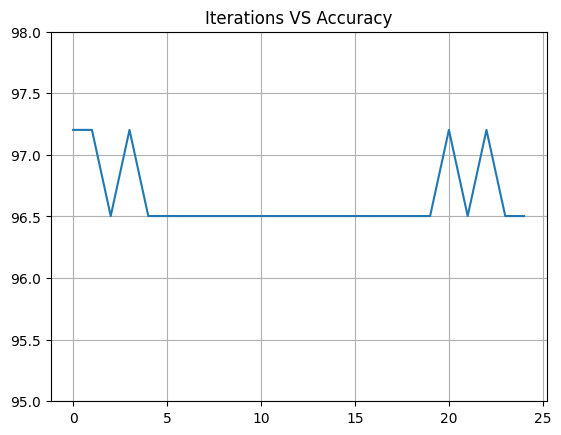

In [82]:
plt.plot(trial, glob_min_search)
plt.ylim(95, 98)
plt.title("Iterations VS Accuracy")
plt.grid()
plt.show()

In [84]:
max(glob_min_search), glob_min_search.index(max(glob_min_search))

(97.2027972027972, 0)

In [ ]:
# Best model weights and biases 
W = glob_W_search[0]
b = glob_b_search[0]

In [89]:
W

array([ 0.69925061,  0.52331829,  0.69615165,  0.58749864,  0.19653144,
        0.23945353,  0.5628832 ,  0.88031597,  0.39869294, -0.29594914,
        0.43351382,  0.02216294,  0.35248272,  0.29168873, -0.12679724,
       -0.15892289, -0.13397715,  0.08980302,  0.00657577, -0.21085736,
        0.91728539,  0.82109487,  0.8464967 ,  0.65200419,  0.49664308,
        0.42932416,  0.53302588,  1.15536235,  0.68001621,  0.27447343])

In [90]:
b

array([3.53594797])

In [91]:
y_pred = predict(W, b, x_test)
final_acc = accuracy(y_pred, y_test)

In [94]:
print("Final accuracy of the binary classification", round(final_acc, 2), "%")

Final accuracy of the binary classification 97.2 %
